In [1]:
from notebooks.vector_service import embedding_model
from win32comext.adsi.demos.search import search

from notebooks.weather_tool import weather

from notebooks.experiment import tools

print('Hey')

Hey


## Creating a end to end prototype that works

In [2]:
# load the brain
from src.utils.model_loader import ModelLoader

llm = ModelLoader().load_llm()
embedding_model = ModelLoader().load_embeddings()
result = llm.invoke("Testing LLM? How are you....")
result.content

{"timestamp": "2025-11-11T12:43:34.218180Z", "level": "info", "event": "OPENAI_API_KEY loaded from environment"}
{"timestamp": "2025-11-11T12:43:34.219185Z", "level": "warning", "event": "GOOGLE_API_KEY is missing from environment"}
{"timestamp": "2025-11-11T12:43:34.219185Z", "level": "warning", "event": "GROQ_API_KEY is missing from environment"}
{"config_keys": ["name", "description", "embedding_model", "retriever", "llm", "multimodal", "qdrant"], "timestamp": "2025-11-11T12:43:34.223209Z", "level": "info", "event": "YAML config loaded"}
{"provider": "openai", "model": "gpt-4o", "timestamp": "2025-11-11T12:43:34.225219Z", "level": "info", "event": "Loading LLM"}
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


"I'm just a computer program, so I don't have feelings, but I'm here and ready to help you! How can I assist you today?"

### Retriever

In [4]:
# Loading qdrant RAG
from uuid import uuid4
from langchain_qdrant import QdrantVectorStore
from qdrant_client import QdrantClient
from qdrant_client.http.models import Distance, VectorParams

# using in memory

client = QdrantClient(":memory:")
client.create_collection(
    collection_name="demo_collection",
    vectors_config=VectorParams(size= 3072, distance=Distance.COSINE)
)

vector_store = QdrantVectorStore(
    client=client,
    embedding=embedding_model,
    collection_name="demo_collection"
)


HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


In [ ]:
docpath = "S:\\Generative AI\\AI-Agent-RAG-pipeline\\data\\attention_is_all_you_need.pdf"

In [5]:
# add documents to the vector store

from src.tools.rag_agent.document_loader import DocumentService
docpath = "S:\\Generative AI\\AI-Agent-RAG-pipeline\\data\\attention_is_all_you_need.pdf"

doc_loader = DocumentService()
documents = doc_loader.process_single_file(docpath, 'pdf')
documents

{"timestamp": "2025-11-11T12:48:25.103648Z", "level": "info", "event": "OPENAI_API_KEY loaded from environment"}
{"timestamp": "2025-11-11T12:48:25.103648Z", "level": "warning", "event": "GOOGLE_API_KEY is missing from environment"}
{"timestamp": "2025-11-11T12:48:25.104648Z", "level": "warning", "event": "GROQ_API_KEY is missing from environment"}
{"config_keys": ["name", "description", "embedding_model", "retriever", "llm", "multimodal", "qdrant"], "timestamp": "2025-11-11T12:48:25.109649Z", "level": "info", "event": "YAML config loaded"}
{"provider": "openai", "model": "gpt-4o", "timestamp": "2025-11-11T12:48:25.110637Z", "level": "info", "event": "Loading LLM"}
{"timestamp": "2025-11-11T12:48:25.277210Z", "level": "info", "event": "Processed PDF: 52 chunks from 15 pages"}


[Document(metadata={'source': 'S:\\Generative AI\\AI-Agent-RAG-pipeline\\data\\attention_is_all_you_need.pdf', 'type': 'pdf', 'pages': 15, 'has_images': False}, page_content='[Page 1]\nProvided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.com\nNoam Shazeer∗\nGoogle Brain\nnoam@google.com\nNiki Parmar∗\nGoogle Research\nnikip@google.com\nJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.com\nAidan N. Gomez∗†\nUniversity of Toronto\naidan@cs.toronto.edu\nŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect t

In [6]:
# crete uuid for each document and add to vector store
uuids = [str(uuid4()) for _ in range(len(documents))]

vector_store.add_documents(documents=documents, ids=uuids)

HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


['a0a185b7-90a2-4e4b-8269-f392b58c54f0',
 '3ea827eb-851d-4174-b58c-d0e1e324a340',
 'f328be7e-2c0e-4834-9b0b-fa2eff996112',
 '49f98e27-b256-4d6a-90d5-1f095c246cf2',
 '4a779e75-2a0c-4f8c-872d-a30974d00d69',
 '068b2543-a60f-4cb5-bd3c-d6f13168c791',
 '865d19dd-d7da-416f-8bd4-a267f1ed91e5',
 'e45393b1-a1cc-4e26-b5f6-ee128c19fe53',
 '1adfbd41-d039-4011-aa44-1e55ce99d0b4',
 '814ca540-0c32-45df-b10b-0bc77da917e5',
 '099e5035-6fc4-4090-9d28-d6dc92bbcb8f',
 'b641700d-1c43-44f5-ab07-7ad6b224cca2',
 'be17ca19-6290-437b-9fe8-7180e4575c44',
 'cbf2dcfe-cdd8-4a4b-92db-5bce09fd491e',
 '342088ac-9fb5-4cb4-8ffa-d2fe155e9f05',
 'a34e1a6c-c6ed-4658-8e33-20471788d857',
 'f02dcc54-ac9e-4a89-a551-ee6e9783ef55',
 '1526ec65-0a35-4b63-9847-d02d8c4974c4',
 '1790816a-2cd0-44f0-a083-1ac508b89c9e',
 'df327f23-7fad-407e-b443-7ad8e468a5a8',
 '9ac083ea-a0d9-4d5f-85ca-1c640c2bfc18',
 '5cb17e40-cae3-4a6b-9909-9eb3fbe6c0fc',
 'b837cc14-a50d-42fc-ad71-d3f3ff63064e',
 'cc4ecaf5-26f6-4bc3-9a6d-6629a51df94f',
 'c1307873-b484-

In [8]:
# vectore store as retriever

retriever = vector_store.as_retriever(search_type= "mmr", search_kwargs= {"k": 3})
retriever.invoke("Who is the author of the book")

HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


[Document(metadata={'source': 'S:\\Generative AI\\AI-Agent-RAG-pipeline\\data\\attention_is_all_you_need.pdf', 'type': 'pdf', 'pages': 15, 'has_images': False, '_id': 'f328be7e-2c0e-4834-9b0b-fa2eff996112', '_collection_name': 'demo_collection'}, page_content='best models from the literature. We show that the Transformer generalizes well to\nother tasks by applying it successfully to English constituency parsing both with\nlarge and limited training data.\n∗Equal contribution. Listing order is random. Jakob proposed replacing RNNs with self-attention and started\nthe effort to evaluate this idea. Ashish, with Illia, designed and implemented the first Transformer models and\nhas been crucially involved in every aspect of this work. Noam proposed scaled dot-product attention, multi-head\nattention and the parameter-free position representation and became the other person involved in nearly every\ndetail. Niki designed, implemented, tuned and evaluated countless model variants in our orig

### weather api tool

In [25]:
from langchain_community.document_loaders import WeatherDataLoader
from dotenv import load_dotenv
import os

load_dotenv()

loader = WeatherDataLoader.from_params(
    ["chennai", "vellore", "Hyderabad"], openweathermap_api_key=os.getenv("OPENWEATHERMAP_API_KEY")
)
documents = loader.load()
documents # directly passed to llm

[Document(metadata={'queried_at': datetime.datetime(2025, 11, 11, 20, 30, 53, 849639)}, page_content='In chennai, the current weather is as follows:\nDetailed status: mist\nWind speed: 4.47 m/s, direction: 30°\nHumidity: 87%\nTemperature: \n  - Current: 28.14°C\n  - High: 28.33°C\n  - Low: 27.78°C\n  - Feels like: 33.65°C\nRain: {}\nHeat index: None\nCloud cover: 75%'),
 Document(metadata={'queried_at': datetime.datetime(2025, 11, 11, 20, 30, 54, 629868)}, page_content='In vellore, the current weather is as follows:\nDetailed status: broken clouds\nWind speed: 1.52 m/s, direction: 98°\nHumidity: 83%\nTemperature: \n  - Current: 24.32°C\n  - High: 24.32°C\n  - Low: 24.32°C\n  - Feels like: 24.97°C\nRain: {}\nHeat index: None\nCloud cover: 54%'),
 Document(metadata={'queried_at': datetime.datetime(2025, 11, 11, 20, 30, 55, 203601)}, page_content='In Hyderabad, the current weather is as follows:\nDetailed status: haze\nWind speed: 3.6 m/s, direction: 60°\nHumidity: 53%\nTemperature: \n  -

## Adding Langgraph Workflow

In [1]:
from src.utils.model_loader import ModelLoader
llm = ModelLoader().load_llm()

{"timestamp": "2025-11-12T02:57:34.597244Z", "level": "info", "event": "OPENAI_API_KEY loaded from environment"}
{"timestamp": "2025-11-12T02:57:34.599257Z", "level": "warning", "event": "GOOGLE_API_KEY is missing from environment"}
{"timestamp": "2025-11-12T02:57:34.599257Z", "level": "warning", "event": "GROQ_API_KEY is missing from environment"}
{"config_keys": ["name", "description", "embedding_model", "retriever", "llm", "multimodal", "qdrant"], "timestamp": "2025-11-12T02:57:34.603281Z", "level": "info", "event": "YAML config loaded"}
{"provider": "openai", "model": "gpt-4o", "timestamp": "2025-11-12T02:57:34.606511Z", "level": "info", "event": "Loading LLM"}


In [5]:
# get the rag
from src.tools.rag_agent.retriever import Retriever

retriever = Retriever()

{"timestamp": "2025-11-12T03:30:51.710103Z", "level": "info", "event": "OPENAI_API_KEY loaded from environment"}
{"timestamp": "2025-11-12T03:30:51.710103Z", "level": "warning", "event": "GOOGLE_API_KEY is missing from environment"}
{"timestamp": "2025-11-12T03:30:51.723947Z", "level": "warning", "event": "GROQ_API_KEY is missing from environment"}
{"config_keys": ["name", "description", "embedding_model", "retriever", "llm", "multimodal", "qdrant"], "timestamp": "2025-11-12T03:30:51.741780Z", "level": "info", "event": "YAML config loaded"}
{"model": "text-embedding-3-large", "timestamp": "2025-11-12T03:30:51.741780Z", "level": "info", "event": "Loading embedding model"}
{"timestamp": "2025-11-12T03:30:52.334684Z", "level": "info", "event": "Created collection successfully demo-collection"}
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
{"timestamp": "2025-11-12T03:30:54.104328Z", "level": "info", "event": "Created vector store successfully demo-collection"}


In [8]:
from src.tools.rag_agent.document_loader import DocumentService
path = "S:\\Generative AI\\AI-Agent-RAG-pipeline\\data\\attention_is_all_you_need.pdf"
retrieved_docs = DocumentService().process_single_file(path, 'pdf')
retriever.add_documents_to_vstore(retrieved_docs)

{"timestamp": "2025-11-12T03:35:41.597721Z", "level": "info", "event": "OPENAI_API_KEY loaded from environment"}
{"timestamp": "2025-11-12T03:35:41.597721Z", "level": "warning", "event": "GOOGLE_API_KEY is missing from environment"}
{"timestamp": "2025-11-12T03:35:41.597721Z", "level": "warning", "event": "GROQ_API_KEY is missing from environment"}
{"config_keys": ["name", "description", "embedding_model", "retriever", "llm", "multimodal", "qdrant"], "timestamp": "2025-11-12T03:35:41.611322Z", "level": "info", "event": "YAML config loaded"}
{"provider": "openai", "model": "gpt-4o", "timestamp": "2025-11-12T03:35:41.612578Z", "level": "info", "event": "Loading LLM"}
{"timestamp": "2025-11-12T03:35:41.891748Z", "level": "info", "event": "Processed PDF: 52 chunks from 15 pages"}
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
{"timestamp": "2025-11-12T03:35:44.927208Z", "level": "info", "event": "Added 52 documents to demo-collection"}


In [9]:
from langchain.tools import tool
retriever.call_retriever("What is best thing in this pdf")

HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
{"timestamp": "2025-11-12T03:35:56.815378Z", "level": "info", "event": "retriever invoked successfully"}


[Document(metadata={'source': 'S:\\Generative AI\\AI-Agent-RAG-pipeline\\data\\attention_is_all_you_need.pdf', 'type': 'pdf', 'pages': 15, 'has_images': False, '_id': '566e1321-466d-4999-a2b4-29abc4cf0cce', '_collection_name': 'demo-collection'}, page_content='[Page 15]\nThe\nLaw\nwill\nnever\nbe\nperfect\n,\nbut\nits\napplication\nshould\nbe\njust\n-\nthis\nis\nwhat\nwe\nare\nmissing\n,\nin\nmy\nopinion\n.\n<EOS>\n<pad>\nThe\nLaw\nwill\nnever\nbe\nperfect\n,\nbut\nits\napplication\nshould\nbe\njust\n-\nthis\nis\nwhat\nwe\nare\nmissing\n,\nin\nmy\nopinion\n.\n<EOS>\n<pad>\nThe\nLaw\nwill\nnever\nbe\nperfect\n,\nbut\nits\napplication\nshould\nbe\njust\n-\nthis\nis\nwhat\nwe\nare\nmissing\n,\nin\nmy\nopinion\n.\n<EOS>\n<pad>\nThe\nLaw\nwill\nnever\nbe\nperfect\n,\nbut\nits\napplication\nshould\nbe\njust\n-\nthis\nis\nwhat\nwe\nare\nmissing\n,\nin\nmy\nopinion\n.\n<EOS>\n<pad>\nFigure 5: Many of the attention heads exhibit behaviour that seems related to the structure of the\nsentence. We

In [43]:
# creating weather tool
from langchain_community.utilities import OpenWeatherMapAPIWrapper
weather = OpenWeatherMapAPIWrapper()

In [47]:
weather_data = weather.run("Hyderabad")
print(weather_data)

In Hyderabad, the current weather is as follows:
Detailed status: haze
Wind speed: 2.06 m/s, direction: 40°
Humidity: 68%
Temperature: 
  - Current: 19.73°C
  - High: 19.73°C
  - Low: 19.73°C
  - Feels like: 19.53°C
Rain: {}
Heat index: None
Cloud cover: 20%


In [48]:
# using the tools
tools = [weather.run]
from langchain.agents import create_agent
agent = create_agent(
    model=llm,
    tools=tools

)

In [49]:
input_message = {
    "role": "user",
    "content": "What is the weather like in Hyderabad can you go outside?"
}

for step in agent.stream(
    {"messages": [input_message]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

What is the weather like in Hyderabad can you go outside?


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


================================== Ai Message ==================================
Tool Calls:
  run (call_DMGdNq0Xu0JcBZKjUiXp5gD5)
 Call ID: call_DMGdNq0Xu0JcBZKjUiXp5gD5
  Args:
    location: Hyderabad
================================= Tool Message =================================
Name: run

In Hyderabad, the current weather is as follows:
Detailed status: haze
Wind speed: 2.06 m/s, direction: 40°
Humidity: 68%
Temperature: 
  - Current: 19.73°C
  - High: 19.73°C
  - Low: 19.73°C
  - Feels like: 19.53°C
Rain: {}
Heat index: None
Cloud cover: 20%


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


================================== Ai Message ==================================

The current weather in Hyderabad is hazy with a temperature of 19.73°C, and it feels like 19.53°C. The wind is blowing at 2.06 m/s from the northeast, and the humidity is at 68%. Cloud cover is at 20%, and there is no rain at the moment.

You can go outside, but be mindful of the haze, which might affect visibility and air quality.


In [ ]:
## Build langgraph workflow



In [31]:
## Add the tools

from langchain.tools import tool
from typing import List

@tool(name_or_callable='weather', description="Fetches the live weather data")
def fetch_weather(cities: List):
    loader = WeatherDataLoader.from_params(cities, openweathermap_api_key=os.getenv("OPENWEATHERMAP_API_KEY"))
    documents = loader.load()
    return documents

SyntaxError: incomplete input (2044376540.py, line 5)

In [3]:
from langchain_community.utilities import OpenWeatherMapAPIWrapper


weather = OpenWeatherMapAPIWrapper()
print(weather.run("Hyderabad"))

In Hyderabad, the current weather is as follows:
Detailed status: haze
Wind speed: 3.6 m/s, direction: 30°
Humidity: 64%
Temperature: 
  - Current: 21.23°C
  - High: 22.73°C
  - Low: 21.23°C
  - Feels like: 21.08°C
Rain: {}
Heat index: None
Cloud cover: 20%


In [35]:
tools = [weather.run]

In [39]:
print("GO")

GO


In [40]:
# Adding langgraph workflow Decide stateflow
from langchain.messages import AnyMessage
from langgraph.graph.message import add_messages
from typing_extensions import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage, HumanMessage



class MessagesState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]


In [4]:
# define the tools
from langchain.tools import tool

def get_document_context(query:str):
    "RAG that get the context based on query"
    retriever = Retriever()
    return retriever.call_retriever(query)


def get_weather_data(location:str):
    """Fetches weather data from OpenWeatherMap based on location"""
    weather = OpenWeatherMapAPIWrapper()
    return weather.run(location)

# Augment the LLM with tools
tools = [get_document_context, get_weather_data]
tools_by_name = {tool.name: tool for tool in tools}
model_with_tools = llm.bind_tools(tools)


AttributeError: 'function' object has no attribute 'name'

In [54]:
# Define state
from langchain.messages import AnyMessage
from typing_extensions import TypedDict, Annotated
import operator


class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], operator.add]
    llm_calls: int

In [57]:
from langchain.messages import SystemMessage


def llm_call(state: dict):
    """LLM decides whether to call a tool or not"""

    return {
        "messages": [
            model_with_tools.invoke(
                [
                    SystemMessage(
                        content="You are a helpful assistant tasked with performing arithmetic on a set of inputs."
                    )
                ]
                + state["messages"]
            )
        ],
        "llm_calls": state.get('llm_calls', 0) + 1
    }

In [58]:
from langchain.messages import ToolMessage


def tool_node(state: dict):
    """Performs the tool call"""

    result = []
    for tool_call in state["messages"][-1].tool_calls:
        tool = tools_by_name[tool_call["name"]]
        observation = tool.invoke(tool_call["args"])
        result.append(ToolMessage(content=observation, tool_call_id=tool_call["id"]))
    return {"messages": result}

In [60]:
from typing import Literal
from langgraph.graph import StateGraph, START, END


def should_continue(state: MessagesState) -> Literal["tool_node", END]:
    """Decide if we should continue the loop or stop based upon whether the LLM made a tool call"""

    messages = state["messages"]
    last_message = messages[-1]

    # If the LLM makes a tool call, then perform an action
    if last_message.tool_calls:
        return "tool_node"

    # Otherwise, we stop (reply to the user)
    return END

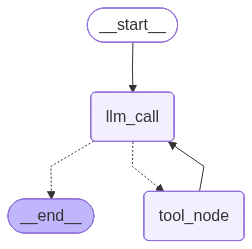

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


================================ Human Message =================================

What's weather in chennai, can i go out?
================================== Ai Message ==================================
Tool Calls:
  get_weather_data (call_nB08eFxRXdIC94wb0tWyKCFA)
 Call ID: call_nB08eFxRXdIC94wb0tWyKCFA
  Args:
    location: Chennai
================================= Tool Message =================================

In Chennai, the current weather is as follows:
Detailed status: mist
Wind speed: 4.92 m/s, direction: 19°
Humidity: 92%
Temperature: 
  - Current: 26.94°C
  - High: 27.27°C
  - Low: 26.16°C
  - Feels like: 30.77°C
Rain: {}
Heat index: None
Cloud cover: 40%
================================== Ai Message ==================================

The current weather in Chennai is misty with a temperature of 26.94°C, which feels like 30.77°C. The humidity is quite high at 92%, and there is a moderate wind speed of 4.92 m/s coming from the north-northeast. The cloud cover is 40%.

Given

In [61]:
# Build workflow
agent_builder = StateGraph(MessagesState)

# Add nodes
agent_builder.add_node("llm_call", llm_call)
agent_builder.add_node("tool_node", tool_node)

# Add edges to connect nodes
agent_builder.add_edge(START, "llm_call")
agent_builder.add_conditional_edges(
    "llm_call",
    should_continue,
    ["tool_node", END]
)
agent_builder.add_edge("tool_node", "llm_call")

# Compile the agent
agent = agent_builder.compile()

# Show the agent
from IPython.display import Image, display
display(Image(agent.get_graph(xray=True).draw_mermaid_png()))

# Invoke
from langchain.messages import HumanMessage
messages = [HumanMessage(content="What's weather in chennai, can i go out?")]
messages = agent.invoke({"messages": messages})
for m in messages["messages"]:
    m.pretty_print()

In [ ]:

retriever.add_documents_to_vstore()